<a href="https://colab.research.google.com/github/osmarbraz/sri/blob/main/3_1_Embeddings_Word2Vec_Gensim_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding(pt-br) usando Word2Vec

Manipulação de de word embendding usando Word2Vec através da biblioteca Gensim Python Library com execução através do Google Colaboratory.

 Gensim Python Library é uma biblioteca open-source para modelagem de tópicos não supervisionados e processamento de linguagem.
Implementado em Python e Cython.
Projetado para lidar com grandes volumes de texto, usando fluxo de dados e algoritmos on-line incrementais.
Seu diferencial em relação a maioria dos outros software para aprendizado de máquina os quais visam apenas o processamento em memória.<br>

Modelo Word2Vec disponibilizado em:
http://nilc.icmc.usp.br/embeddings

Documentação complementar:
https://medium.com/analytics-vidhya/word2vector-using-gensim-e055d35f1cb4

# 1 Preparação do ambiente
Preparação do ambiente para executar o gensim.

## 1.1 Tratamento de logs

In [ ]:
#Biblioteca de logging
import logging

#Formato da mensagem
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## 1.2 Parâmetros

Parâmetros da execução do notebook.

Nome dos modelos em http://nilc.icmc.usp.br/embeddings.

In [ ]:

#Definição do nome do arquivo compactado do modelo
arquivoModeloCompactado = 'cbow_s100.zip'

#Definição do nome do arquivo do modelo
arquivoModelo = 'cbow_s100.txt'

logging.info('Parâmetros definidos!')

## 1.3 Instalação biblioteca

Instalando o gensim no Google Colaboratory.

No Jupiter Notebook executar através "Anaconda Prompt".


In [ ]:
#!pip install -U gensim
!pip install -U gensim==4.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2


## 1.4 Download modelo

Para usar o Gensim, você pode criar o seu vetor de palavras e treiná-lo ou utilizar um dataset previamente treinado.

Neste apresentação utilizamos o dataset fornecido por Kyubyong Park, disponível em http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s100.zip

São dados da Wikipidia Brasileira com:<br>
*   100 dimensões
*   850Mb Corpus
*   929606 vocabulário

Outros modelos em  :
http://nilc.icmc.usp.br/embeddings

In [ ]:
# Realiza o download do arquivo do modelo para o diretório corrente
!wget -O $arquivoModeloCompactado http://143.107.183.175:22980/download.php?file=embeddings/word2vec/$arquivoModeloCompactado

--2023-09-26 12:37:52--  http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s100.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 326003567 (311M) [application/octet-stream]
Saving to: ‘cbow_s100.zip’

cbow_s100.zip       100%[===================>] 310.90M  8.04MB/s    in 39s     

2023-09-26 12:38:32 (7.88 MB/s) - ‘cbow_s100.zip’ saved [326003567/326003567]



Descompacta o arquivo do modelo.

In [ ]:
!unzip -o -j -q "$arquivoModeloCompactado" -d "."

logging.info("Terminei a descompactação.")

Mostra o diretório corrente e seus arquivos.

In [ ]:
!pwd
!ls -la

/content
total 1189468
drwxr-xr-x 1 root root      4096 Sep 26 12:38 .
drwxr-xr-x 1 root root      4096 Sep 26 12:36 ..
-rw-r--r-- 1 root root 891982906 Oct  4  2018 cbow_s100.txt
-rw-r--r-- 1 root root 326003567 Sep 26 12:38 cbow_s100.zip
drwxr-xr-x 4 root root      4096 Sep 22 13:26 .config
drwxr-xr-x 1 root root      4096 Sep 22 13:27 sample_data


# 2 Prepara o modelo
Carrega as bibliotecas e modelo pré treinado para executar os exemplos.

## 2.1 Importando as bibliotecas do Gensim
Importa as bibliotecas do Gensim para carregar o modelo pré treinado.

In [ ]:
from IPython.display import display, HTML
from jinja2 import Template

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

logging.info('Import realizado!')

## 2.2 Carregando o modelo

In [ ]:
model = KeyedVectors.load_word2vec_format(arquivoModelo)
logging.info('Modelo carregado!')

Mostra alguns dados do modelo carregado para saber se ele foi carregado.

In [ ]:
print(model)

KeyedVectors<vector_size=100, 929606 keys>


A palavra `rei` possui entrada no modelo e um conjunto de pesos.

In [ ]:
print(len(model['rei']))
print(model['rei'])

100
[-0.112856 -0.031181 -0.082636  0.02254   0.465806  0.036634 -0.298364
 -0.008195 -0.179189 -0.211212 -0.161554  0.10146  -0.322099 -0.052593
  0.122636  0.050005  0.253793  0.152922  0.074108 -0.225479 -0.210047
  0.287319  0.03736   0.168659 -0.552812  0.365903 -0.127217 -0.254735
  0.485083  0.27677   0.154973 -0.058206 -0.169606 -0.280174 -0.07972
 -0.487805  0.503746 -0.250429  0.044544  0.194235 -0.23043  -0.094684
  0.115602 -0.345173  0.413301 -0.044894 -0.039231 -0.033985  0.034322
 -0.281035  0.116224 -0.148824 -0.372722  0.06823  -0.397361 -0.174968
  0.3687    0.086867  0.147501 -0.319509 -0.466883 -0.224919  0.081631
  0.010889  0.098368  0.220969  0.163031 -0.423855  0.079595 -0.249087
 -0.423565 -0.13188  -0.233184 -0.302046 -0.047613 -0.492572  0.183027
  0.036602 -0.238503 -0.031511  0.160806  0.049208  0.216763 -0.005949
  0.587419 -0.277021 -0.074845 -0.343154  0.006842 -0.213375 -0.050197
 -0.172439 -0.021656  0.04522   0.012773  0.099418 -0.100936 -0.004556
 -0

Mostra as 10 palavras mais similares a `rei`.

In [ ]:
model.most_similar('rei')

[('imperador', 0.8816402554512024),
 ('príncipe', 0.8355997204780579),
 ('ex-rei', 0.809827983379364),
 ('monarca', 0.8086540102958679),
 ('príncipe-herdeiro', 0.7889789342880249),
 ('faraó', 0.788607120513916),
 ('sacro-imperador', 0.7805773615837097),
 ('grão-príncipe', 0.7798528075218201),
 ('príncipe-regente', 0.7620863914489746),
 ('sultão', 0.761908233165741)]

## 2.3 Função de apresentação dos dados
Função para melhorar a apresentação dos dados dos exemplos.

In [ ]:
table_list_template = """
<table>
        <tr>
           <th>Palavra</th>
           <th>Similaridade</th>
        </tr>
        {% for item in items%}
        <TR>
           <TD class="c1">{{item[0]}}</TD>
           <TD class="c2">{{item[1]}}</TD>
        </TR>
        {% endfor %}
</table>
"""
def most_similar(positive, negative):
    nn = model.most_similar(positive=positive, negative=negative)
    tmpl = Template(table_list_template)
    output_html = tmpl.render(items=nn)
    return HTML(output_html)

logging.info('Função criada')

# 3 Exemplos

**DICA**:<br>
Para palavras com sinais léxicos, utilizar o caractere "**u**" antes da mesma para codifica-la como utf-8.


## 3.1 Comparando palavras diferentes

Rei + Mulher – Homem = ?

In [ ]:
most_similar(positive=['rei','mulher'], negative=['homem'])

Palavra,Similaridade,esposa,0.688875675201416,filha,0.6741011142730713,governanta,0.6724554300308228,sobrinha,0.6699941158294678,madrasta,0.6670833230018616,concubina,0.6659663915634155,dama-de-companhia,0.6614803075790405,benção,0.6593201160430908,múmia,0.6535747051239014,bênção,0.6500141620635986


Rainha + Homem – Mulher = ?

In [ ]:
most_similar(positive=[u'rainha',u'homem'], negative=[u'mulher'])

Palavra,Similaridade,rapaz,0.596022367477417,moço,0.5901417136192322,frêmito,0.5900194048881531,pescador,0.5842908620834351,rei,0.5820015668869019,energúmeno,0.5774466395378113,prelado,0.5773632526397705,herói,0.5767453908920288,fazendeiro,0.5760966539382935,panegírico,0.5754227638244629


Brasil + Criminalidade = ?

In [ ]:
most_similar(positive=['brasil',u'criminalidade'], negative=[])

Palavra,Similaridade,haiti,0.6928511261940002,mèdio-oriente,0.6729540228843689,ocidente,0.6618376970291138,japão,0.6592310070991516,emtanto,0.6588366627693176,luxembur-go,0.6531606316566467,eixo-x,0.6494155526161194,mediterrâ-neo,0.6454842686653137,romildão,0.6439343690872192,desemprego,0.6430919170379639


Outros exemplos:

In [ ]:
most_similar(positive=['presidente'], negative=['poder'])

Palavra,Similaridade,vice-presidente,0.5463547706604004,presi-dente,0.5321359038352966,diretor-presidente,0.504767894744873,diretor-executivo,0.49954476952552795,pre-sidente,0.48533493280410767,presidenta,0.4851401746273041,presidente-executivo,0.4699709713459015,co-presidente,0.4606279134750366,primeiro-secretário,0.4578101336956024,senadora,0.4525180459022522


In [ ]:
most_similar(positive=['brasil','estudo'], negative=['carnaval'])

Palavra,Similaridade,mapa,0.6093395948410034,radiofármaco,0.5723233819007874,levantamento,0.5550850033760071,periódico,0.5530095100402832,glog,0.5420612692832947,caixabi,0.5415791273117065,tópico,0.5360736846923828,relatório,0.5359439253807068,avaliador,0.5354234576225281,falso-positivo,0.5353556871414185


In [ ]:
most_similar(positive=['brasil','universidade'], negative=[])

Palavra,Similaridade,grand-palais,0.6825948357582092,liceu,0.6681314706802368,teatro-cine,0.6585230231285095,denny's,0.6575983762741089,euro00,0.6547542810440063,lu-xemburgo,0.6533187627792358,ymca,0.6502246856689453,hoftheater,0.6485138535499573,contraturno,0.6484382748603821,institudo,0.646901547908783


In [ ]:
most_similar(positive=[u'homem',u'máquina'], negative=[])

Palavra,Similaridade,banhista,0.7167549133300781,mototaxi,0.69287109375,guante,0.6866202354431152,ascensorista,0.685158908367157,berlinde,0.6773380637168884,manete,0.6750791668891907,vidente,0.6726037859916687,fitinha,0.6669137477874756,rapaz,0.6660336852073669,manifestante,0.6638907194137573


In [ ]:
most_similar(positive=[u'palio',u'vw'], negative=[u'fiat'])

Palavra,Similaridade,fiorino,0.6193507313728333,uno,0.5799717903137207,doblò,0.5427682995796204,mobi,0.5371865034103394,barchetta,0.49594664573669434,ecosport,0.4901596009731293,hb00,0.48337042331695557,veloster,0.47979313135147095,cr.00,0.47686779499053955,stilo,0.4720591604709625


In [ ]:
most_similar(positive=[u'roma',u'alemanha'], negative=[u'itália'])

Palavra,Similaridade,avinhão,0.7504276633262634,florença,0.7407116889953613,ravena,0.7384095788002014,constantinopla,0.7250113487243652,sárdis,0.7127199172973633,cartago,0.7124226093292236,veneza,0.7082253694534302,gênova,0.6928679347038269,atenas,0.6919061541557312,amório,0.6917916536331177


In [ ]:
most_similar(positive=[u'lendo',u'jogado'], negative=[u'lido'])

Palavra,Similaridade,roubando,0.7006303668022156,caçando,0.6921532154083252,descansando,0.6807905435562134,jogando,0.6715488433837891,pegando,0.6684536933898926,consertando,0.6674918532371521,pulando,0.658521294593811,virando,0.6568830013275146,polindo,0.655945360660553,fotografando,0.6485264301300049


In [ ]:
most_similar(positive=[u'nuvens',u'estrela'], negative=[u'nuvem'])

Palavra,Similaridade,estrelas,0.6892478466033936,galas,0.6090782880783081,sombras,0.5997710824012756,pestanas,0.5925516486167908,luzes,0.5895288586616516,superproduções,0.5894025564193726,canduras,0.5870558023452759,constelações,0.5854816436767578,auras,0.5834820866584778,pombas,0.5811574459075928


In [ ]:
most_similar(positive=[u'tenista',u'futebol'], negative=[u'tênis'])

Palavra,Similaridade,ciclista,0.6736172437667847,basquetebolista,0.6411615610122681,judoca,0.636603832244873,ex-tenista,0.6354328989982605,golfista,0.6228874921798706,enxadrista,0.592896044254303,naturalizado,0.5907281637191772,halterofilista,0.5863692164421082,fundista,0.5837550163269043,triatleta,0.5834997892379761


In [ ]:
most_similar(positive=[u'tenista',u'xadrez'], negative=[u'tênis'])

Palavra,Similaridade,golfista,0.6553205251693726,ciclista,0.632626473903656,enxadrista,0.6211749315261841,basquetebolista,0.5931174159049988,ex-tenista,0.5898265242576599,pugilista,0.5720880627632141,montanhista,0.5706957578659058,judoca,0.5688527226448059,cosmonauta,0.5652159452438354,ginasta,0.5599121451377869


## 3.2 Identificando palavras não relacionadas

In [ ]:
texto = 'laranja maça uva carro banana mamão'
palavras = texto.split()
print(palavras)

#palavras que não correspondem frutas
nn = model.doesnt_match(palavras)

print(nn)

['laranja', 'maça', 'uva', 'carro', 'banana', 'mamão']
carro


In [ ]:
texto = 'martelo serrote uva prego furadeira formão'
palavras = texto.split()
print(palavras)

#palavras que não correspondem frutas
nn = model.doesnt_match(palavras)

print(nn)

['martelo', 'serrote', 'uva', 'prego', 'furadeira', 'formão']
uva


## 3.3 Comparando palavras iguais

Sentença de exemplo

In [ ]:
texto = "Depois de roubar o cofre do banco,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

logging.info('Texto armazenado!')

In [ ]:
palavras = [texto.split()]
print(palavras)

[['Depois', 'de', 'roubar', 'o', 'cofre', 'do', 'banco,', 'o', 'ladrão', 'de', 'banco', 'foi', 'visto', 'sentado', 'no', 'banco', 'da', 'praça', 'central.']]


Carrega o vocabulário do modelo somente com as palavras dos texto

In [ ]:
model1 = Word2Vec(palavras, min_count=1)

# model1 = Word2Vec(palavras,
#                   min_count=1,
#                   workers=1,
#                   size=100,
#                   window=1)

print(model1)

Word2Vec<vocab=16, vector_size=100, alpha=0.025>


Imprime o vocabulário.

In [ ]:
words = list(model1.wv.key_to_index)
i = 0
for token in words:
   print(i, token)
   i = i + 1

0 banco
1 o
2 de
3 central.
4 praça
5 da
6 no
7 sentado
8 visto
9 foi
10 ladrão
11 banco,
12 do
13 cofre
14 roubar
15 Depois


A palavra banco possui somente uma entrada no modelo e somente um conjunto de pesos.

In [ ]:
print(len(model1.wv['banco']))
print(model1.wv['banco'])

100
[-5.4407766e-04  2.4207660e-04  5.1109078e-03  9.0116877e-03
 -9.2969295e-03 -7.1246228e-03  6.4609172e-03  8.9829508e-03
 -5.0168810e-03 -3.7745319e-03  7.3821810e-03 -1.5437993e-03
 -4.5472211e-03  6.5586665e-03 -4.8583644e-03 -1.8092578e-03
  2.8892150e-03  1.0010172e-03 -8.2888547e-03 -9.4565907e-03
  7.3170480e-03  5.0689816e-03  6.7707673e-03  7.5652049e-04
  6.3583688e-03 -3.3979204e-03 -9.5509895e-04  5.7744225e-03
 -7.5240666e-03 -3.9271335e-03 -7.5061489e-03 -9.3231973e-04
  9.5419120e-03 -7.3285126e-03 -2.3323589e-03 -1.9401998e-03
  8.0829747e-03 -5.9266253e-03  5.2854961e-05 -4.7459821e-03
 -9.5973359e-03  5.0025028e-03 -8.7680481e-03 -4.3915431e-03
 -3.9069320e-05 -2.9165877e-04 -7.6581542e-03  9.6121654e-03
  4.9837003e-03  9.2383036e-03 -8.1509789e-03  4.4864239e-03
 -4.1403091e-03  8.2422025e-04  8.4977830e-03 -4.4584796e-03
  4.5276186e-03 -6.7822384e-03 -3.5485558e-03  9.4116414e-03
 -1.5887510e-03  3.2217792e-04 -4.1406723e-03 -7.6846541e-03
 -1.5050021e-03  2.4

# 4 Plotando gráficos

Para plotar um conjunto de palavras execute o script abaixo:

In [ ]:
# Import das bibliotecas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_words(words):
  #Carrega o vetor das palavras a serem plotadas
  vectors = []
  for word in words:
        vectors.append(model[word])

  #Ajustar um modelo 2D de PCA aos vetores
  pca = PCA(n_components=2)
  resultado = pca.fit_transform(vectors)

  #Dimensões da figura
  plt.figure(figsize=(12,7))
  #Adiciona linha vertical
  plt.axvline()
  #Adiciona linha horizontal
  plt.axhline()

  #Criar um gráfico de dispersão da projeção
  plt.scatter(resultado[:, 0], resultado[:, 1])
  #Adiciona as palavras no gráfico
  for i in range(len(words)):
      plt.annotate(words[i], xy=(resultado[i, 0], resultado[i, 1]))

  #Mostra o gráfico
  plt.show()

logging.info('Função criada')

O comando abaixo plota o gráfico das palavras especificadas.

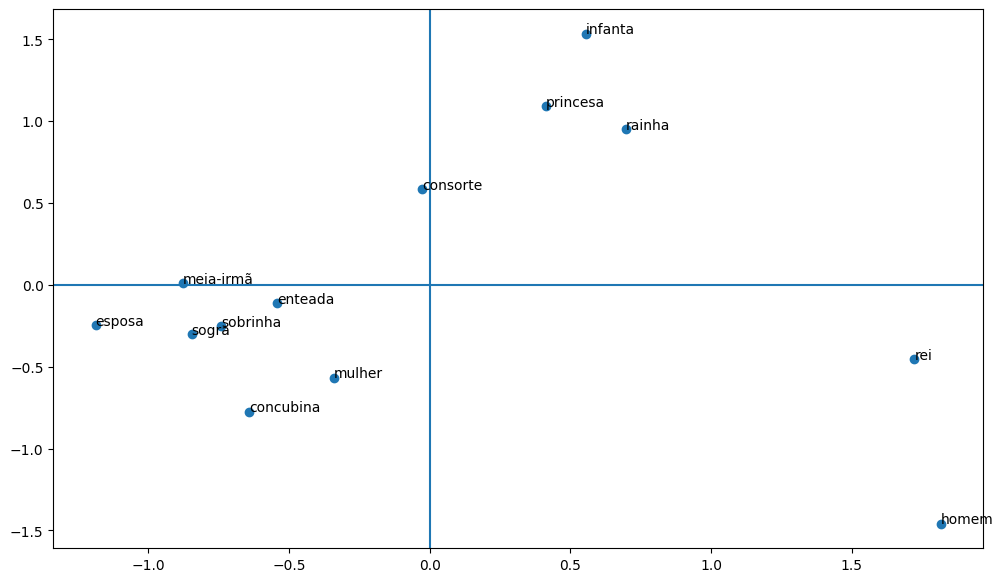

In [ ]:
lista = ['rei', 'rainha', 'homem', 'mulher','esposa','concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada']

plot_words(lista)

Lista as palavras do vocabulário

In [ ]:
words = list(model1.wv.key_to_index)
print(len(words))
print(words[0:1000])

16
['banco', 'o', 'de', 'central.', 'praça', 'da', 'no', 'sentado', 'visto', 'foi', 'ladrão', 'banco,', 'do', 'cofre', 'roubar', 'Depois']


## 4.1 Visualizando o modelo

Aqui tentamos visualizar a conexão entre as seguintes palavras em um subespaço 2D

### Função de visualização

In [ ]:
#Import das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotar_words(Wl):
  #Carrega o vetor das palavras a serem plotadas
  Wv = []
  for i in range(len(Wl)):
      Wv.append(model[Wl[i]])

  #Queremos um subespaço onde Wv[0]-Wv[1] e Wv[2]-Wv[3] sejam as linhas do eixo,
  #então essas 4 palavras estão no eixo correspondente
  b1 = (Wv[1]-Wv[0])
  b2 = (Wv[3]-Wv[2])

  #Transforma a lista de embeddings em um vetor simples
  W = np.array(Wv)
  #Transforma as diferenças em um vetor simples
  B = np.array([b1,b2])
  #Calcula o pseudo-inversa de uma matriz
  Bi = np.linalg.pinv(B.T)

  #Multiplica Bi e W.T
  Wp = np.matmul(Bi,W.T)
  #Calcula os pivos
  Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

  #Dimensões da figura
  plt.figure(figsize=(12,7))
  #Adiciona linha vertical
  plt.axvline()
  #Adiciona linha horizontal
  plt.axhline()
  #Criar um gráfico de dispersão da projeção
  plt.scatter(Wp[0,:], Wp[1,:])
  rX = max(Wp[0,:])-min(Wp[0,:])
  rY = max(Wp[1,:])-min(Wp[1,:])
  eps = 0.005
  #Adiciona as palavras no gráfico
  for i, txt in enumerate(Wl):
      plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
  #Mostra o gráfico
  plt.show()

logging.info('Função criada')

### Exemplo

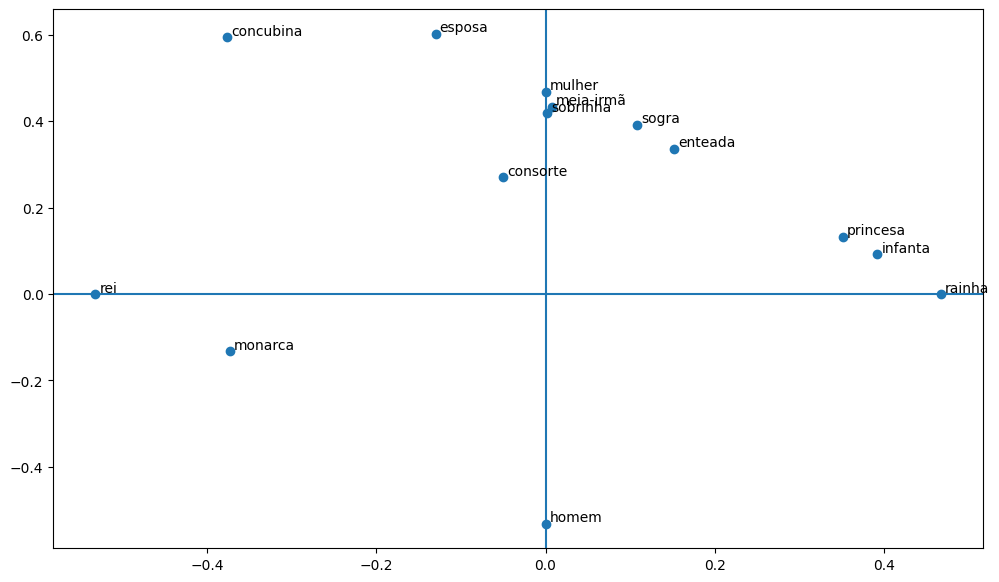

In [ ]:
palavras =['rei', 'rainha', 'homem', 'mulher','esposa', 'monarca', 'concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada']

plotar_words(palavras)

### Detalhamento da função

Import das bibliotecas

In [ ]:
#Import das bibliotecas
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Lista de palavras a serem visualizadas

In [ ]:
#Lista das palavras
palavras = ['rei', 'rainha', 'homem', 'mulher','esposa', 'monarca', 'concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada']

#Lista dos embeddings das palavras
Wv = []
for i in range(len(palavras)):
    Wv.append(model[palavras[i]])

Queremos um subespaço onde rei-rainha e homem-mulher são as linhas do eixo, então essas 4 palavras estão no eixo correspondente




In [ ]:
#Diferença de Wv[1]-Wv[0]
b1 = (Wv[1]-Wv[0])
#Diferença de Wv[3]-Wv[2]
b2 = (Wv[3]-Wv[2])

Queremos que a base seja (1,0) e (0,1) do espaço projetado. Com uma matriz quadrada, devemos calcular a matriz inversa para obter os vetores base. No entanto, a matriz não quadrada tem apenas pseudo-inversa.

In [ ]:
#Transforma a lista de embeddings em um vetor simples
W = np.array(Wv)
#Transforma as diferenças em um vetor simples
B = np.array([b1,b2])
#Calcula o pseudo-inversa de uma matriz
Bi = np.linalg.pinv(B.T)

In [ ]:
#Mostra as dimensões de B e W
print(B.shape)
print(W.T.shape)

(2, 100)
(100, 14)


Projete todas as incorporações de palavras no subespaço 2D.

  Temos que mudar as linhas rei-rainha e homem-mulher para o eixo.

In [ ]:
#Multiplica Bi e W.T
Wp = np.matmul(Bi,W.T)
print(Wp.shape)
#Calcula os pivos
Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

(2, 14)


Vamos colocar as palavras no plano cartesiano!

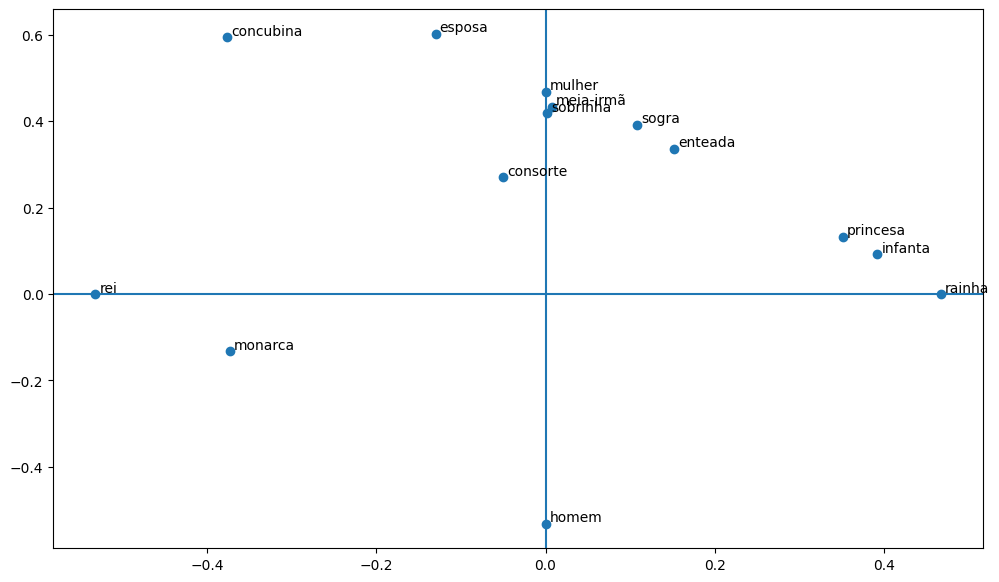

In [ ]:
#Dimensões da figura
plt.figure(figsize=(12,7))
#Adiciona linha vertical
plt.axvline()
#Adiciona linha horizontal
plt.axhline()
#Plota eixo x e y
plt.scatter(Wp[0,:], Wp[1,:])
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
eps = 0.005
#Percore a lista de palavras
for i, txt in enumerate(palavras):
    plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
plt.show()

# 5 Exemplo comparando os embeddings das ocorrências da palavra "banco" em uma sentença.

## 6 Comparando embeddings de palavras

In [ ]:
texto = "Depois de roubar o cofre do banco ,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

logging.info('Texto armazenado!')

In [ ]:
palavras = texto.split()
print(palavras)

['Depois', 'de', 'roubar', 'o', 'cofre', 'do', 'banco', ',', 'o', 'ladrão', 'de', 'banco', 'foi', 'visto', 'sentado', 'no', 'banco', 'da', 'praça', 'central.']


Confirmando os tokens do documento

In [ ]:
i = 0
for token in palavras:
   print(i, token)
   i = i + 1

0 Depois
1 de
2 roubar
3 o
4 cofre
5 do
6 banco
7 ,
8 o
9 ladrão
10 de
11 banco
12 foi
13 visto
14 sentado
15 no
16 banco
17 da
18 praça
19 central.


Gera os embeddings

In [ ]:
model = Word2Vec([palavras], min_count=1)

# model = Word2Vec(sentences=[palavras],
#                  min_count=1,
#                  workers=4,
#                  size=100,
#                  window=1)

print(model)

Word2Vec<vocab=16, vector_size=100, alpha=0.025>


Palavras recuperadas do modelo

In [ ]:
words = list(model.wv.key_to_index)
i = 0
for token in words:
   print(i, token)
   i = i + 1

0 banco
1 o
2 de
3 central.
4 praça
5 da
6 no
7 sentado
8 visto
9 foi
10 ladrão
11 ,
12 do
13 cofre
14 roubar
15 Depois


Exibe os embenddings das palavras

A palavra banco aparece somente no índice 6, 11 e 16 do texto original.

Mas as ocorrências foram retiradas da saída pois possuem a mesma representação no modelo.


In [ ]:
# Índice das palavras a serem comparadas
palavra1 = 6
palavra2 = 11
palavra3 = 16

print("Os primeiros 5 valores de cada instância de \"banco\".")
print("")

print(str(words[palavra1]), model.wv[words[palavra1]][:5])
print(str(words[palavra1]), model.wv[words[palavra1]][:5])
print(str(words[palavra1]), model.wv[words[palavra1]][:5])

Os primeiros 5 valores de cada instância de "banco".

no [ 0.00813745 -0.00445597 -0.00106785  0.00101037 -0.00018994]
no [ 0.00813745 -0.00445597 -0.00106785  0.00101037 -0.00018994]
no [ 0.00813745 -0.00445597 -0.00106785  0.00101037 -0.00018994]


In [ ]:
# Importando as bibliotecas
from scipy.spatial.distance import cosine

# Índice das palavras a serem comparadas
print("Período:", texto)
print("Palavra 1 =", palavra1, "=", str(words[palavra1]), "(instituição financeira)")
print("Palavra 2 =", palavra2, "=", str(words[palavra1]), "(instituição financeira)")
print("Palavra 3 =", palavra3, "=", str(words[palavra1]), "(assento)")

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "banco da praça" (diferentes significados).
#banco_diferente = doc[palavra2].similarity(doc[palavra3])
banco_diferente = 1 - cosine(model.wv[words[palavra1]], model.wv[words[palavra1]])

print("Vetor de similaridade  para diferentes significados(",palavra2,",",palavra3,"):  %.2f" % banco_diferente)

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "cofre do banco" (mesmo significado).
mesmo_banco = 1 - cosine(model.wv[words[palavra1]], model.wv[words[palavra1]])

print("Vetor de similaridade  para mesmo significado(",palavra2,",",palavra1,"):  %.2f" % mesmo_banco)

# Calcula a similaridade de coseno entre as palavras banco
# Em "cofre do banco" versus "banco da praça" (diferente significados).
banco_diferente2 = 1 - cosine(model.wv[words[palavra1]], model.wv[words[palavra1]])

print("Vetor de similaridade  para diferentes significados(",palavra3,",",palavra1,"):  %.2f" % banco_diferente2)

Período: Depois de roubar o cofre do banco , o ladrão de banco foi visto sentado no banco da praça central.
Palavra 1 = 6 = no (instituição financeira)
Palavra 2 = 11 = no (instituição financeira)
Palavra 3 = 16 = no (assento)
Vetor de similaridade  para diferentes significados( 11 , 16 ):  1.00
Vetor de similaridade  para mesmo significado( 11 , 6 ):  1.00
Vetor de similaridade  para diferentes significados( 16 , 6 ):  1.00
